# Figure 6

In [7]:
library(RColorBrewer)

In [8]:
ncgr_nt_kmers <- read.table("../assembly_evaluation_data/unique_kmers_ncgr_nt.txt",header=TRUE,sep="\t")
colnames(ncgr_nt_kmers)<-c("SampleName","nt_unique_kmers")
head(ncgr_nt_kmers)

SampleName,nt_unique_kmers
MMETSP1403,14078915
MMETSP0292,10829338
MMETSP1316,10049557
MMETSP1042,20957422
MMETSP0228,49090117
MMETSP0944,23943500


In [9]:
dib_ncgr_kmers <- read.csv("../assembly_evaluation_data/MMETSP_all_evaluation_matrix.csv")
dib_ncgr_kmers <- dib_ncgr_kmers[,c("SampleName","Phylum","dib_assembly_unique_kmers","ncgr_assembly_unique_kmers")]
dib_ncgr_kmers <- merge(dib_ncgr_kmers,ncgr_nt_kmers,by="SampleName")
unique_dammit_names <- read.csv("../assembly_evaluation_data/normalized_unique_gene_names_ncgr_dib.csv")
unique_dammit_names <- unique_dammit_names[,2:4]
colnames(unique_dammit_names) <- c("SampleName","NCGR_norm_unique_gene_names","DIB_norm_unique_gene_names")
unique_dammit_names <- merge(dib_ncgr_kmers,unique_dammit_names,by="SampleName")
head(unique_dammit_names)
#unique_dammit_names <- unique_dammit_names[,c(1,2,5,6)]
#head(dib_ncgr_kmers)
#dim(dib_ncgr_kmers)
#head(unique_dammit_names)
#dim(unique_dammit_names)
special_flowers = c("MMETSP0693","MMETSP1019","MMETSP0923","MMETSP0008","MMETSP1002","MMETSP1325","MMETSP1018",
                    "MMETSP1346","MMETSP0088","MMETSP0092","MMETSP0717","MMETSP0223","MMETSP0115","MMETSP0196",
                    "MMETSP0197","MMETSP0398","MMETSP0399","MMETSP0922")
unique_dammit_names <- unique_dammit_names[!unique_dammit_names$SampleName %in% special_flowers,]

SampleName,Phylum,dib_assembly_unique_kmers,ncgr_assembly_unique_kmers,nt_unique_kmers,NCGR_norm_unique_gene_names,DIB_norm_unique_gene_names
MMETSP0007,Haptophyta,12496793,6672958,10776806,0.1553238,0.3038187
MMETSP0009,Bacillariophyta,30074483,17983358,24244646,0.1250278,0.2619097
MMETSP0011,Rhodophyta,19018154,8659798,13483086,0.1282602,0.3395015
MMETSP0018,Ciliophora,9666691,26864,7817848,0.5238095,0.9876067
MMETSP0040,Cercozoa,23878073,14826337,19815768,0.1054775,0.3242380
MMETSP0041,Cercozoa,22194734,8846735,9560866,0.1685256,0.3280542


In [10]:
# Only use 7 most common phyla
sub_phy<-c("Bacillariophyta","Dinophyta","Ochrophyta","Haptophyta","Ciliophora","Chlorophyta","Cryptophyta")

In [11]:
dib_ncgr_kmers <- dib_ncgr_kmers[!dib_ncgr_kmers$SampleName %in% special_flowers,]
dib_ncgr_kmers<-dib_ncgr_kmers[dib_ncgr_kmers$Phylum %in% sub_phy,]
unique(as.character(dib_ncgr_kmers$Phylum))

[1] "Ochrophyta"      "Haptophyta"      "Bacillariophyta" "Ciliophora"     
[5] "Dinophyta"       "Chlorophyta"     "Cryptophyta"

pdf 
  2

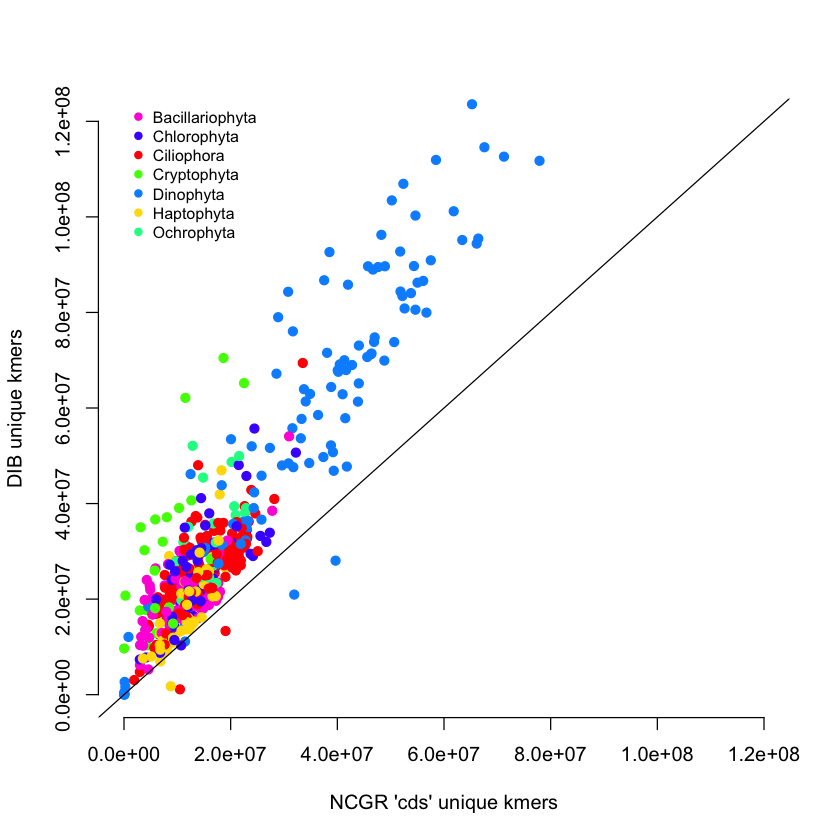

In [23]:
Cols = function(vec){
  #cols=cols=palette(brewer.pal(n=7,name="Dark2"))
  cols=rainbow(length(unique(vec)))
  return(cols[as.numeric(as.factor(vec))])}

dib_ncgr_kmers <- dib_ncgr_kmers[!dib_ncgr_kmers$SampleName %in% special_flowers,]
dib_ncgr_kmers<-dib_ncgr_kmers[dib_ncgr_kmers$Phylum %in% sub_phy,]
#pdf("../paper/figures/Figure6_unique_kmers.pdf",width=6.41,height=6.41)
#png("../paper/figures/Figure6_unique_kmers.png",width=6.41,height=6.41,units="in",res=1200)
plot(dib_ncgr_kmers$ncgr_assembly_unique_kmers,dib_ncgr_kmers$dib_assembly_unique_kmers, 
     ylim=c(-1,120000000),
     xlim=c(-1,120000000),
     ylab = "DIB unique kmers",
     xlab="NCGR 'cds' unique kmers",
     col=Cols(as.character(dib_ncgr_kmers$Phylum)),
     pch=19,
     frame.plot = FALSE)
abline(0,1)
legend(20,125000000,legend=unique(as.character(dib_ncgr_kmers$Phylum)),
       col=Cols(unique(as.character(dib_ncgr_kmers$Phylum))),
       cex=0.8, 
       pch=19,bty="n")
dev.off()
plot(dib_ncgr_kmers$ncgr_assembly_unique_kmers,dib_ncgr_kmers$dib_assembly_unique_kmers, 
     ylim=c(-1,120000000),
     xlim=c(-1,120000000),
     ylab = "DIB unique kmers",
     xlab="NCGR 'cds' unique kmers",
     col=Cols(as.character(dib_ncgr_kmers$Phylum)),
     pch=19,frame.plot = FALSE)
abline(0,1)
legend(20,125000000,legend=sort(unique(as.character(dib_ncgr_kmers$Phylum))),col=Cols(unique(as.character(dib_ncgr_kmers$Phylum))),cex=0.8, pch=19,bty="n")

pdf 
  2

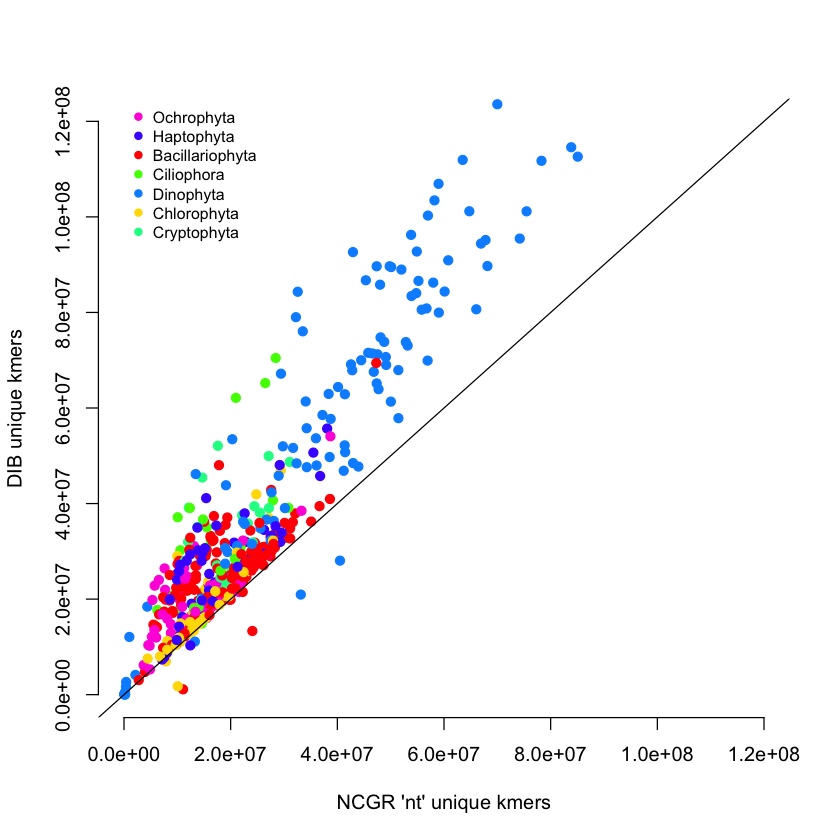

In [28]:
Cols = function(vec){
  #cols=cols=palette(brewer.pal(n=7,name="Dark2"))
  cols=rainbow(length(unique(vec)))
  return(cols[as.numeric(as.factor(vec))])}
pdf("../paper/Figure4_unique_kmers.pdf",width=6.41,height=6.41)
png("../paper/Figure4_unique_kmers.png",width=6.41,height=6.41,units="in",res=1200)
plot(dib_ncgr_kmers$nt_unique_kmers,dib_ncgr_kmers$dib_assembly_unique_kmers, 
     ylim=c(-1,120000000),xlim=c(-1,120000000),
     ylab = "DIB unique kmers",
     xlab="NCGR 'nt' unique kmers",
     col=Cols(as.character(dib_ncgr_kmers$Phylum)),pch=19,frame.plot = FALSE)
abline(0,1)
legend(20,125000000,
       legend=unique(as.character(dib_ncgr_kmers$Phylum)),
       col=Cols(unique(as.character(dib_ncgr_kmers$Phylum))),
       cex=0.8, 
       pch=19,bty="n")
dev.off()
plot(dib_ncgr_kmers$nt_unique_kmers,dib_ncgr_kmers$dib_assembly_unique_kmers, 
     ylim=c(-1,120000000),xlim=c(-1,120000000),
     ylab = "DIB unique kmers",
     xlab="NCGR 'nt' unique kmers",
     col=Cols(as.character(dib_ncgr_kmers$Phylum)),
     pch=19,frame.plot = FALSE)
abline(0,1)
legend(20,125000000,legend=unique(as.character(dib_ncgr_kmers$Phylum)),col=Cols(unique(as.character(dib_ncgr_kmers$Phylum))),cex=0.8, pch=19,bty="n")

In [46]:
dib_low<-dib_ncgr_kmers[which(dib_ncgr_kmers$dib_assembly_unique_kmers - dib_ncgr_kmers$nt_unique_kmers < 1),]
dim(dib_low)
dib_low

[1] 14  5

,SampleName,Phylum,dib_assembly_unique_kmers,ncgr_assembly_unique_kmers,nt_unique_kmers
84,MMETSP0121,Dinophyta,20949606,31922723,33149899
101,MMETSP0152,Bacillariophyta,19871282,14645491,19985406
111,MMETSP0169,Bacillariophyta,13326017,19044174,24068069
143,MMETSP0229,Dinophyta,75019,35307,98008
149,MMETSP0252,Dinophyta,838,77421,210754
154,MMETSP0268,Dinophyta,28049369,39665517,40498904
185,MMETSP0329,Bacillariophyta,1116295,10487339,11073265
197,MMETSP0380,Dinophyta,11119805,11445573,13278318
337,MMETSP0891,Ochrophyta,21495878,13987767,21552431
370,MMETSP0930,Chlorophyta,6963662,6805540,7848158


In [47]:
dim(dib_ncgr_kmers)

[1] 522   5

# Figure 7

In [6]:
head(unique_dammit_names)

SampleName,Phylum,dib_assembly_unique_kmers,ncgr_assembly_unique_kmers,NCGR_norm_unique_gene_names,DIB_norm_unique_gene_names
MMETSP0007,Haptophyta,12496793,6672958,0.1553238,0.3038187
MMETSP0009,Bacillariophyta,30074483,17983358,0.1250278,0.2619097
MMETSP0011,Rhodophyta,19018154,8659798,0.1282602,0.3395015
MMETSP0018,Ciliophora,9666691,26864,0.5238095,0.9876067
MMETSP0040,Cercozoa,23878073,14826337,0.1054775,0.3242380
MMETSP0041,Cercozoa,22194734,8846735,0.1685256,0.3280542


pdf 
  2

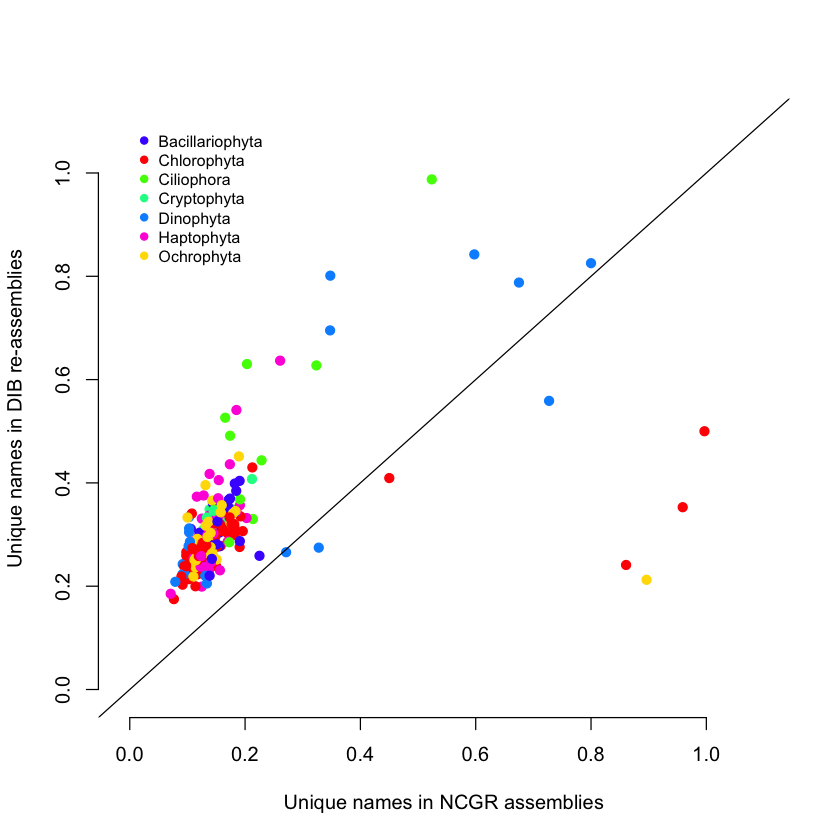

In [26]:
library(RColorBrewer)
Cols = function(vec){
  #cols=palette(brewer.pal(n=7,name="Dark2"))
  cols=rainbow(length(unique(vec)))
  return(cols[as.numeric(as.factor(vec))])}

sub_phy<-c("Bacillariophyta","Dinophyta","Ochrophyta","Haptophyta","Ciliophora","Chlorophyta","Cryptophyta")
unique_dammit_names <- unique_dammit_names[unique_dammit_names$Phylum %in% sub_phy,]
pdf("../paper/Figure7_unique_gene_names.pdf")
png("../paper/Figure7_unique_gene_names.png",width=6.41,height=6.41,units="in",res=1200)
plot(unique_dammit_names$NCGR,unique_dammit_names$DIB,ylim=c(-0.01,1.1),xlim=c(-0.01,1.1),
     col=Cols(as.character(unique_dammit_names$Phylum)),pch=19,
     ylab = "Unique names in DIB re-assemblies",
     xlab="Unique names in NCGR assemblies",
     frame.plot = FALSE)
abline(0,1)
legend(0,1.1,legend=unique(as.character(unique_dammit_names$Phylum)),
       col=Cols(unique(as.character(unique_dammit_names$Phylum))),
       cex=0.8, pch=19,bty="n")
dev.off()
plot(unique_dammit_names$NCGR,unique_dammit_names$DIB,ylim=c(-0.01,1.1),xlim=c(-0.01,1.1),
     col=Cols(as.character(unique_dammit_names$Phylum)),pch=19,
     ylab = "Unique names in DIB re-assemblies",
     xlab="Unique names in NCGR assemblies",
     frame.plot = FALSE)
abline(0,1)
legend(0,1.1,legend=sort(unique(as.character(unique_dammit_names$Phylum))),col=Cols(unique(as.character(unique_dammit_names$Phylum))),cex=0.8, pch=19,bty="n")

In [8]:
class(as.character(unique_dammit_names$Phylum))

[1] "character"

In [9]:
head(unique_dammit_names)

,SampleName,Phylum,dib_assembly_unique_kmers,ncgr_assembly_unique_kmers,NCGR_norm_unique_gene_names,DIB_norm_unique_gene_names
1,MMETSP0007,Haptophyta,12496793,6672958,0.1553238,0.3038187
2,MMETSP0009,Bacillariophyta,30074483,17983358,0.1250278,0.2619097
4,MMETSP0018,Ciliophora,9666691,26864,0.5238095,0.9876067
7,MMETSP0043,Cryptophyta,37553635,20930649,0.1384121,0.3487689
8,MMETSP0044,Dinophyta,135164,62526,0.8000000,0.8253968
22,MMETSP0103,Ochrophyta,31093513,11765427,0.1384385,0.4173982


# What is the average percentage (± stdev) of newly-assembled contigs that annotated to a database (Pfam, Rfam, and OrthoDB)

In [10]:
num_contigs = read.csv("../assembly_evaluation_data/annotation_stats.csv")
dib_contig_nums = read.csv("../assembly_evaluation_data/transrate_reference_scores_cds.csv")
ncgr_contig_nums = read.csv("../assembly_evaluation_data/transrate_imicrobe_scores.csv")

In [11]:
num_contigs_sub = num_contigs[,c(1,2,3)]
contigs = dib_contig_nums[,c(2,44)]
colnames(num_contigs_sub) <- c("MMETSP","total_annotated_contigs","unique_anotations")
colnames(contigs)<-c("n_contigs","MMETSP")

In [12]:
num_contigs_new <- merge(num_contigs_sub,contigs,by="MMETSP")
num_contigs_new <- num_contigs_new[!num_contigs_new$MMETSP %in% special_flowers,]

In [13]:
head(num_contigs_new)

,MMETSP,total_annotated_contigs,unique_anotations,n_contigs
1,MMETSP0004,26851,12707,31798
2,MMETSP0005,26252,12246,30447
3,MMETSP0006,36795,17810,42819
4,MMETSP0007,17308,7773,26600
7,MMETSP0009,36990,12576,47658
8,MMETSP0010,35765,14801,35648


In [14]:
average_perc_annotated = mean(num_contigs_new$total_annotated_contigs/num_contigs_new$n_contigs)
average_perc_unique_annotated = mean(num_contigs_new$unique_anotations/num_contigs_new$n_contigs)

In [15]:
mean(num_contigs_new$total_annotated_contigs/num_contigs_new$n_contigs)

[1] 0.9106026

In [16]:
sd(num_contigs_new$total_annotated_contigs/num_contigs_new$n_contigs)

[1] 1.581437

In [17]:
mean(num_contigs_new$unique_anotations/num_contigs_new$n_contigs, na.rm=TRUE)

[1] 0.4526137

In [18]:
sd(num_contigs_new$unique_anotations/num_contigs_new$n_contigs, na.rm=TRUE)

[1] 0.8732772

In [19]:
head(ncgr_contig_nums)

assembly,SampleName,n_seqs,smallest,largest,n_bases,mean_len,n_under_200,n_over_1k,n_over_10k,⋯,p_contigs_uncovbase,contigs_uncovered,p_contigs_uncovered,contigs_lowcovered,p_contigs_lowcovered,contigs_segmented,p_contigs_segmented,score,optimal_score,cutoff
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP0909.cds.fa.fixed.fa,MMETSP0909,17793,150,5295,13335459,726.3241,2371,4918,0,⋯,0.62997,73,0.00410,2864,0.16096,5822,0.32721,0.08002,0.08486,0.02586
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP1138.cds.fa.fixed.fa,MMETSP1138,21907,150,13716,22494042,1016.9273,1248,8959,4,⋯,0.75834,3558,0.16241,11314,0.51646,621,0.02835,0.15532,0.29205,0.46644
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP0317.cds.fa.fixed.fa,MMETSP0317,10424,150,14124,12824577,1225.5069,287,5182,5,⋯,0.68314,1624,0.15579,4927,0.47266,142,0.01362,0.29773,0.48681,0.45753
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP0370.cds.fa.fixed.fa,MMETSP0370,54971,150,7545,41366781,725.2256,8621,15861,0,⋯,0.67985,291,0.00529,21782,0.39625,2127,0.03869,0.17398,0.24414,0.41163
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP1412.cds.fa.fixed.fa,MMETSP1412,14977,150,11460,19276146,1275.2630,1015,7611,2,⋯,0.66075,43,0.00287,3505,0.23403,1752,0.11698,0.22650,0.25427,0.32807
/mnt/research/ged/lisa/mmetsp/imicrobe/cds/MMETSP0527.cds.fa.fixed.fa,MMETSP0527,69295,150,14601,78969480,1126.2404,5335,30963,43,⋯,0.76190,8868,0.12797,40461,0.58389,1478,0.02133,0.22165,0.39974,0.52570


In [20]:
false_crbb <- num_contigs[,c(1,4)]
colnames(false_crbb)<-c("MMETSP","annotations_w_false_crbb")
false_crbb <- false_crbb[!false_crbb$MMETSP %in% special_flowers,]
num_contigs_new <- merge(num_contigs_new,false_crbb,by="MMETSP")

In [21]:
head(num_contigs_new)

MMETSP,total_annotated_contigs,unique_anotations,n_contigs,annotations_w_false_crbb
MMETSP0004,26851,12707,31798,2246
MMETSP0005,26252,12246,30447,1748
MMETSP0006,36795,17810,42819,4691
MMETSP0007,17308,7773,26600,1368
MMETSP0009,36990,12576,47658,NA
MMETSP0010,35765,14801,35648,3675


In [22]:
mean(num_contigs_new$annotations_w_false_crbb/num_contigs_new$n_contigs, na.rm=TRUE)

[1] 0.07884789

In [23]:
sd(num_contigs_new$annotations_w_false_crbb/num_contigs_new$n_contigs, na.rm=TRUE)

[1] 0.1942385

# What happened to the low unique *k*-mers in Figure 6?

In [24]:
dib_low<-dib_ncgr_kmers[which(dib_ncgr_kmers$Unique_kmers_assembly < 1000000),]
dim(dib_low)
head(dib_low)

[1] 0 4

SampleName,Phylum,dib_assembly_unique_kmers,ncgr_assembly_unique_kmers


In [25]:
ncgr_greater<-dib_low[which(dib_low$Unique_kmers_assembly<dib_low$Unique_kmers),]
dim(ncgr_greater)
ncgr_greater

[1] 0 4

SampleName,Phylum,dib_assembly_unique_kmers,ncgr_assembly_unique_kmers
